# Homework #1
### Numerical Computation
##### Andrew Pickner
I worked alone on this assignment.

In [ ]:
# adding any global imports here...
import numpy as np

# #1

In [3]:
x = 9.4
y = x - 9
z = y - 0.4

# Exact Arithmetic
# (9.4 - 9) - 0.4 = 0

# 3.3306690738754696e-16
print(z)

3.3306690738754696e-16


Just a sidenote before I dive into the explanation: Although I couldn't get any definitive info on how python deals with infinitely repeating binary representations, I assume it uses the Round to Nearest Rule. Also, python's floats are 64-bit double precision.

The incorrect answer ultimately comes down to rounding error introduced when we have floats that require infinite bits to represent accurately. This error can compound and cause more problems down the line as more calculations are carried out.

Initially, we start out by storing $9.4$, (a value that would need infinite bits to represent) in `x`. Sauer's textbook shows that `x` would be equal to: $9.4 + 0.2 \times 2^{-49}$. In this case, $0.2 \times 2^{-49}$ is the rounding error.

We then subtract 9 from that, and because 9 can be represented with no error, we have: $0.4 + 0.2 \times 2^{-49}$.

Earlier in the textbook, we find $0.4$ to be equal to: $0.4 + 0.1 \times 2^{-52}$. Now when we subtract this value from the value we have above we have the following:

$0.2 \times 2^{-49} - 0.1 \times 2^{-52} = 0.1 \times 2^{-52}(2^4-1) = \boxed{3 \times 2^{-52}}$

In [16]:
# and this matches the incorrect answer we got above!
3 *(2 ** (-53))

3.3306690738754696e-16

# #2

I use Desmos to prove that they are equal, and they do look equal on all the intervals I looked at.

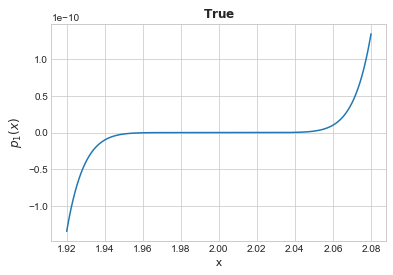

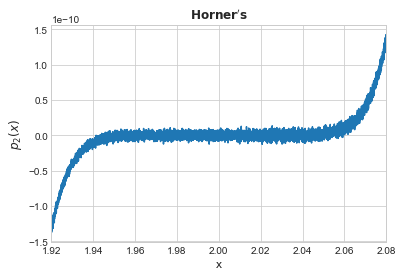

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

def p1(x):
    return ((x-2) ** 9)

# horner's algorithm
def horner_algo(A, x):
    p = A[-1]
    i = len(A) - 2
    while i >= 0:
        p = p * x + A[i]
        i -= 1
    return p

#########################################################################

x_left = 1.92
x_right = 2.08
xs = np.linspace(x_left, x_right, num=8000)

#########################################################################

fig = plt.figure()
ax1 = plt.axes()

ax1.set_xlabel("x", fontsize=12)
ax1.set_ylabel("$p_1(x)$", fontsize=12)
ax1.set_title("$\\bf{True}$", fontsize=12)

plt.plot(xs, p1(xs))

#########################################################################

fig = plt.figure()
ax2 = plt.axes()

ax2.set_xlabel("x", fontsize=12)
ax2.set_ylabel("$p_2(x)$", fontsize=12)
ax2.set_title("$\\bf{Horner's}$", fontsize=12)

p2_coefficients = [-512, 2304, -4608, 5376, -4032, 2016, -672, 144, -18, 1]

plt.xlim([x_left, x_right])

ax2.plot(xs, horner_algo(p2_coefficients, xs))

With Horner's algorithm, we essentially unwrap the polynomial as much as we can using the method of nested multiplication. This allows us to evaluate a polynomial at any given `x` in less arithmetic operations than calculating the value at x naively.

Honestly, I feel like $p_1(x)$ uses less arithmetic operations and is way simpler to write and digest than Horner's algorithm. Sauer's textbook doesn't explain why Horner's plot is so erroneous, rather just explains how it is an efficient algorithm. I'm not entirely sure why Horner's algorithm oscillates. I suppose more rounding errors due to multiplication, and there is potential to subtract incredibly similar numbers so we kind of see the issues from questions 1 and 3 playing an effect here.

# #3

$f_1(x)=\frac{1-cos(x)}{sin^2(x)}$

$f_2(x)=\frac{1}{1+cos(x)}$

Sauer's textbook really helped me get a start on this problem. I assumed we would use $sin^2(x) + cos^2(x) = 1$, but I was honestly pretty stuck on how to get from $f_1$ to $f_2$. We multiply the numerator and denomenator by $1+cos(x)$ like so:

$\frac{1-cos(x)}{sin^2(x)} \cdot \frac{1+cos(x)}{1+cos(x)} = \frac{1+cos(x) \cdot 1-cos(x)}{sin^2(x) \cdot 1+cos(x)} = \frac{1-cos^2(x)}{sin^2(x) + sin^2(x)cos(x)}$

and if we substitute the $1 - cos^2(x)$ for $sin^2(x)$ in the numerator of the last expression, we get:

$\frac{sin^2(x)}{sin^2(x) + sin^2(x)cos(x)}$

finally, we can divide the numerator and denomenator by $sin^2(x)$ to get:

$\boxed{\frac{1}{1+cos(x)} = f_2(x)}$

In [4]:
def f1(x):
    return ((1 - np.cos(x)) / (np.sin(x) ** 2))
    
def f2(x):
    return (1 / (1 + np.cos(x)))
    
points = []
for k in range(13):
    points.append(10 ** (-k))

print("{:<9}\t|\t{:<21}\t|\t{:<21}".format("x", "f1(x)", "f2(x)"))
print("-----------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------")
for point in points:
    print("{:<9}\t|\t{:<21}\t|\t{:<21}".format(point, f1(point), f2(point)))
    print("-----------------------------------------------------------------------------")

x        	|	f1(x)                	|	f2(x)                
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
1        	|	0.6492232052047624   	|	0.6492232052047624   
-----------------------------------------------------------------------------
0.1      	|	0.5012520862885769   	|	0.5012520862885712   
-----------------------------------------------------------------------------
0.01     	|	0.5000125002084805   	|	0.5000125002083363   
-----------------------------------------------------------------------------
0.001    	|	0.5000001249921894   	|	0.5000001250000208   
-----------------------------------------------------------------------------
0.0001   	|	0.4999999986279311   	|	0.50000000125        
-----------------------------------------------------------------------------
1e-05    	|	0.5000000413868522   	|	0.5000000000125      
------------------------------------------------

So the main reason we see this error here is because we are subtracting numbers that are nearly equal in $f_1$. The example in Sauer's textbook is quite nice: If we subtract two numbers that are nearly identical from each other, each with 7 significant digits, we get a result that only has 1 significant digit.

$123.4567-123.4566 = 0.0001$

Basically, $f_1$ subtracts nearly equal numbers and these numbers get closer to being equal as `x` approaches $0$. $f_2$ on the other hand does not face this problem and shows correct values.